### 数据加载与探索

特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
样本数: 150 特征数: 4
真实标签分布:
 0    50
1    50
2    50
Name: count, dtype: int64


D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


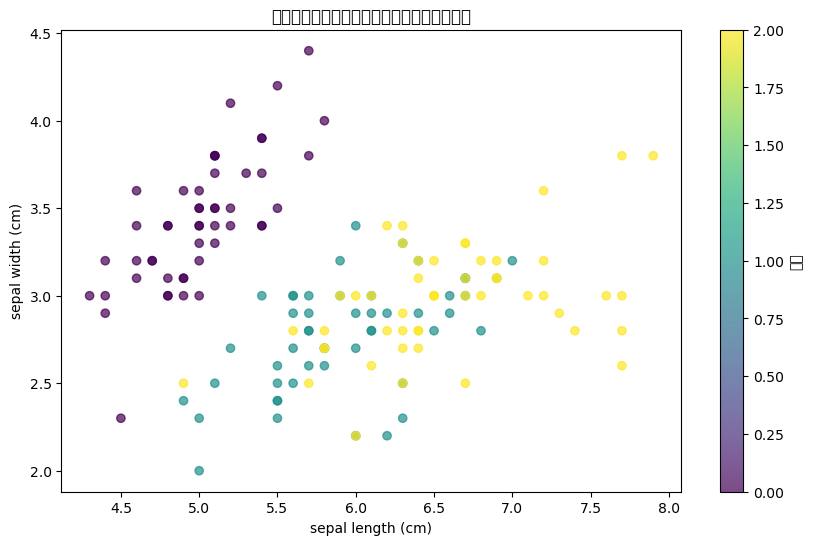

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 加载数据集
data = load_iris()
X = data.data
y = data.target

# 查看数据基本信息
print("特征名称:", data.feature_names)
print("样本数:", X.shape[0], "特征数:", X.shape[1])
print("真实标签分布:\n", pd.Series(y).value_counts())

# 可视化前两个特征分布
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("鸢尾花数据集前两个特征的分布（真实标签）")
plt.colorbar(label="类别")
plt.show()


### 数据预处理


D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.c

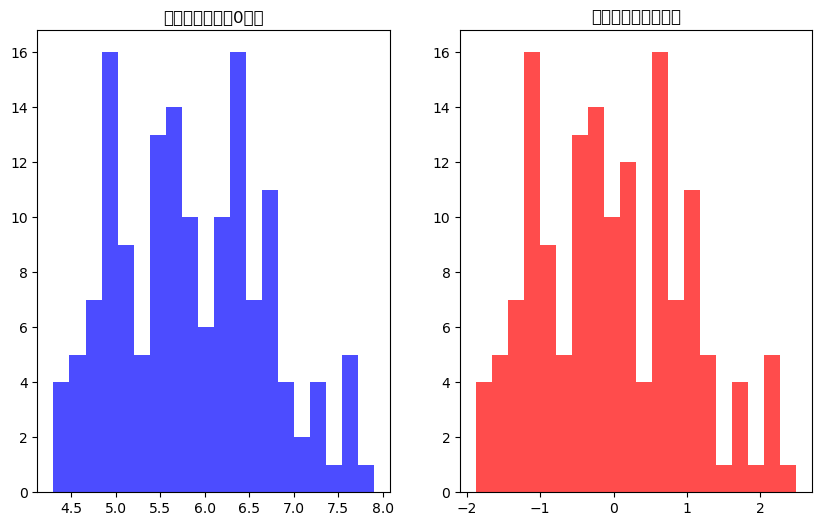

In [4]:
# 标准化特征（K-Means对特征尺度敏感!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 对比标准化前后的特征分布
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(X[:, 0], bins=20, color='blue', alpha=0.7)
plt.title("标准化前的特征0分布")
plt.subplot(1,2,2)
plt.hist(X_scaled[:, 0], bins=20, color='red', alpha=0.7)
plt.title("标准化后的特征分布")
plt.show()


### 手动实现K-Means聚类

In [26]:
class KMeansManual:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters  # 聚类数
        self.max_iters = max_iters
        self.centroids = None   # 聚类中心
        self.labels = None    
    
    def _eculidean_distance(self, x1, x2):
        """计算欧氏距离"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _initialize_centroids(self, X):
        """随机初始化聚类中心"""
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]
    
    def fit(self, X):
        """训练模型：迭代更新聚类中心和样本标签"""
        n_samples, n_features = X.shape
        self.centroids = self._initialize_centroids(X)
        
        for _ in range(self.max_iters):
            # 1.分配样本到最近的聚类中心
            distance = np.zeros((n_samples, self.n_clusters))
            for i in range(self.n_clusters):
                distance[:, i] = np.array([self._eculidean_distance(x, self.centroids[i]) for x in X])
            self.labels = np.argmin(distance, axis=1)
            
            # 2.更新聚类中心
            new_centroids = np.zeros((self.n_clusters, n_features))
            for i in range(self.n_clusters):
                new_centroids[i] = np.mean(X[self.labels == i], axis=0)
            
            # 3.检查是否收敛
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
    def predict(self, X):
        """预测样本的聚类标签"""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.array([self._eculidean_distance(x, self.centroids[i]) for x in X])
        return np.argmin(distances, axis=1)
    
# 训练手动实现的模型
manual_kmeans = KMeansManual(n_clusters=3)
manual_kmeans.fit(X_scaled)

# 预测聚类标签
y_pred_manual = manual_kmeans.predict(X_scaled)


### sklearn实现


D:\anaconda\envs\rurie\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\swxdq\AppData\Local\Temp\ipykernel_13492\754751797.py:23: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_13492\754751797.py:23: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_13492\754751797.py:23: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_13492\754751797.py:23: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_lay


聚类中心:
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


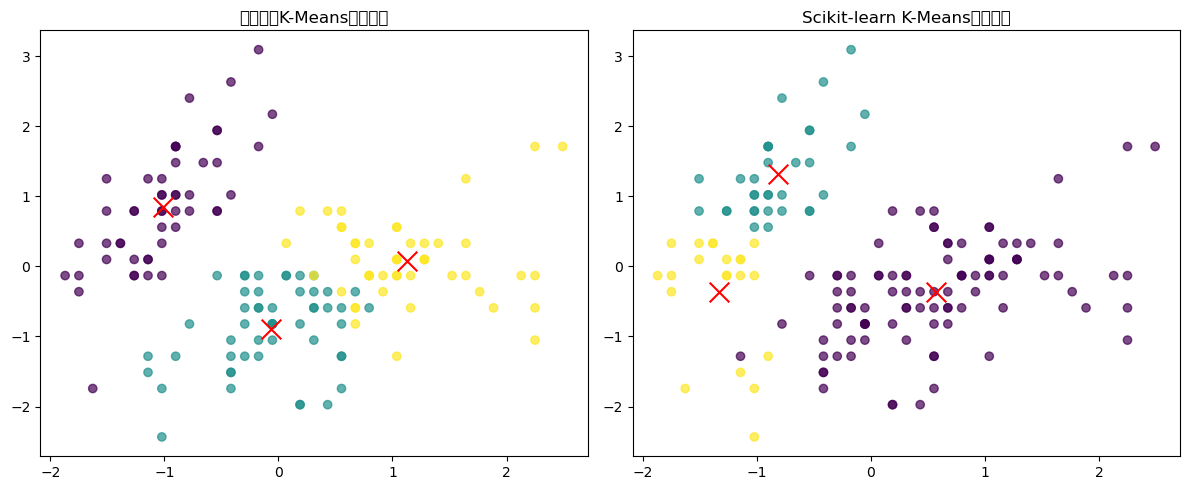

In [28]:
from sklearn.cluster import KMeans

# 创建并训练模型
sklearn_kmeans = KMeans(n_clusters=3, random_state=42)
sklearn_kmeans.fit(X_scaled)

# 预测聚类标签
y_pred_sklearn = sklearn_kmeans.predict(X_scaled)

# 查看聚类中心
print("\n聚类中心:\n", sklearn_kmeans.cluster_centers_)

# 可视化聚类结果
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_manual, cmap='viridis', alpha=0.7)
plt.scatter(manual_kmeans.centroids[:, 0], manual_kmeans.centroids[:, 1], c='red', marker='x', s=200)
plt.title("手动实现K-Means聚类结果")
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_sklearn, cmap='viridis', alpha=0.7)
plt.scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title("Scikit-learn K-Means聚类结果")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数（评估聚类效果）
silhouette_manual = silhouette_score(X_scaled, y_pred_manual)
silhouette_sklearn = silhouette_score(X_scaled, y_pred_sklearn)

print("\n手动实现K-Means的轮廓系数:", silhouette_manual)
print("Scikit-learn K-Means的轮廓系数:", silhouette_sklearn)

# 对比聚类结果与真实标签
print("\n手动实现K-Means vs 真实标签:")
print(pd.crosstab(y, y_pred_manual, rownames=['真实标签'], colnames=['预测标签']))
print("\nScikit-learn K-Means vs 真实标签:")
print(pd.crosstab(y, y_pred_sklearn, rownames=['真实标签'], colnames=['预测标签']))


手动实现K-Means的轮廓系数: 0.45937792074496625
Scikit-learn K-Means的轮廓系数: 0.4798814508199817

手动实现K-Means vs 真实标签:
预测标签   0   1   2
真实标签            
0     50   0   0
1      0  38  12
2      0  14  36

Scikit-learn K-Means vs 真实标签:
预测标签   0   1   2
真实标签            
0      0  33  17
1     46   0   4
2     50   0   0
